In [65]:
from calibrationFunctions import openFiles, calculateForce, calculateTetherExtension, findTetheredBeads
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folderPath = "C:\\Users\\maddr\\OneDrive\\Documents\\MTCode\\Magnetic-Tweezers\\Data\\December\\19\\calebMT"

dataFrame = openFiles(folderPath, numRef=3, numExp=1, fps=400);

Using: C:\Users\maddr\OneDrive\Documents\MTCode\Magnetic-Tweezers\Data\December\19\calebMT


In [3]:

lowForce = []

for index in dataFrame.itertuples():
    if dataFrame['linearMotor'][index[0]] <= 15: lowForce = lowForce + [index[0]]
    if index[0] % 50000 == 0: print("Finding the low force points") 


Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points
Finding the low force points


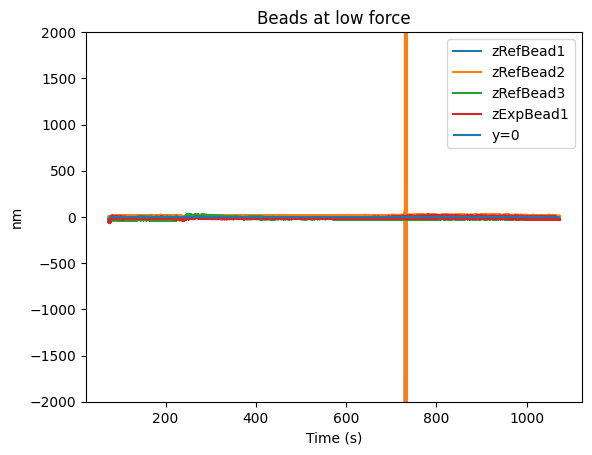

For ExpBead1:
	The low force x-variance is: 3676.4944564906473
	The low force y-variance is: 14890.584438095284
	The low force z-variance is: 4102.269700615916


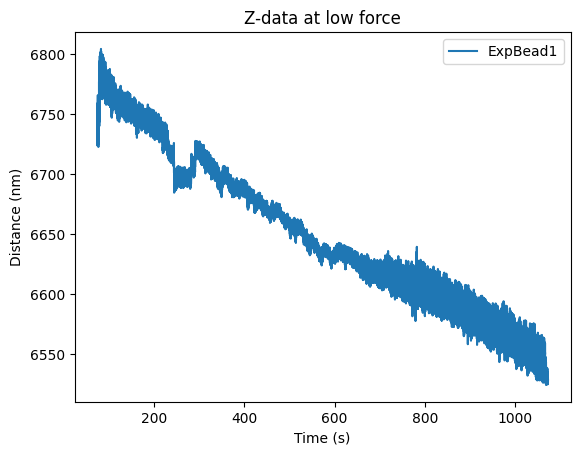

The glass position is:  -65.37799999999994


NameError: name 'PSD' is not defined

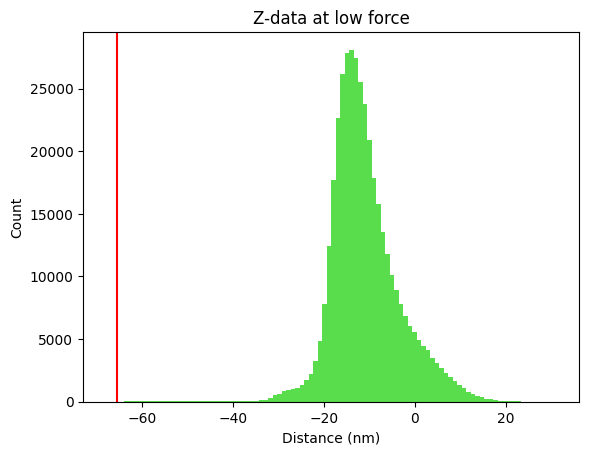

In [5]:
lowForceIdx = [min(lowForce), max(lowForce)]

tetherBeads = findTetheredBeads(dataFrame, lowForceIdx);
dataFrame = calculateTetherExtension(dataFrame, tetherBeads, lowForceIdx);


da

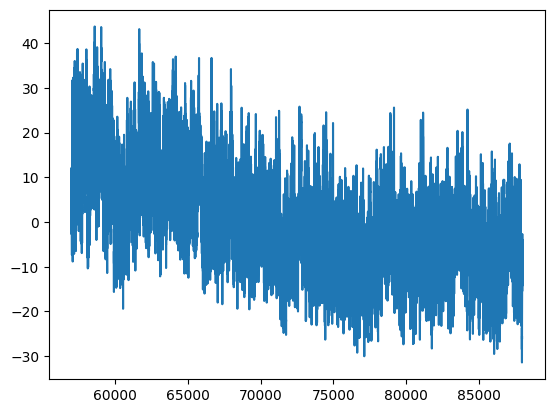

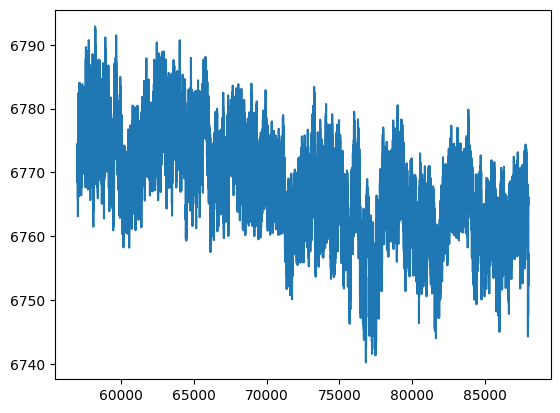

In [66]:
xData1 = dataFrame["xRefBead3"] - dataFrame["xExpBead1"]
xData2 = dataFrame["xRefBead1"] - dataFrame["xExpBead1"]

yData1 = dataFrame["yRefBead3"] - dataFrame["yExpBead1"]
yData2 = dataFrame["yRefBead1"] - dataFrame["yExpBead1"]

zData1 = dataFrame["zRefBead3"] - dataFrame["zExpBead1"]
zData2 = dataFrame["zRefBead1"] - dataFrame["zExpBead1"]


zMotor = dataFrame["linearMotor"] 

# plt.plot(zData1[130000:330000])
# plt.show()

# plt.plot(zData2[130000:330000])
# plt.show()

highForceStart = 0;
highForceEnd = 7400;

medForceStart = 11000
medForceEnd = 27000

lowForceStart = 57000
lowForceEnd = 88000

plt.plot(zData1[lowForceStart:lowForceEnd] - np.mean(zData1[lowForceStart:lowForceEnd]))
plt.show()

plt.plot(zData2[lowForceStart:lowForceEnd])
plt.show()


In [33]:
dataFrame

,timeVector,inf,linearMotor,rotationalMotor,xRefBead1,yRefBead1,zRefBead1,xRefBead2,yRefBead2,zRefBead2,xRefBead3,yRefBead3,zRefBead3,xExpBead1,yExpBead1,zExpBead1,extensionExpBead1
0,0.0000,inf,31.09996,360.0,114326.590962,96327.108841,6789.44,89194.904122,66048.183662,6801.07,128539.356472,49649.051863,6801.79,-91908.872862,-75779.290759,-16.59,48.788
1,0.0025,inf,31.09996,360.0,114326.252458,96326.934798,6789.85,89186.395656,66037.501692,6802.43,128539.482442,49656.120338,6797.41,-91921.567408,-75778.555767,-15.60,49.778
2,0.0050,inf,31.09996,360.0,114326.843548,96327.116605,6789.55,89190.787810,66051.062812,6800.16,128535.713032,49671.762210,6797.11,-91911.463968,-75785.119582,-18.05,47.328
3,0.0075,inf,31.09996,360.0,114326.410082,96325.781844,6790.52,89186.371754,66057.519225,6800.04,128543.070326,49653.478637,6799.58,-91914.890352,-75774.212456,-17.48,47.898
4,0.0100,inf,31.09996,360.0,114326.378428,96325.789608,6790.48,89188.170218,66048.799606,6799.52,128527.543070,49649.111387,6800.08,-91924.007996,-75775.191367,-16.20,49.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462078,1155.1950,inf,31.09996,360.0,114441.139682,96980.150527,6532.22,89253.818676,66744.368602,6524.12,128668.154014,50305.221147,6552.16,-91928.909198,-75812.690840,-22.46,42.918
462079,1155.1975,inf,31.09996,360.0,114440.761126,96978.918639,6532.47,89249.087372,66732.118951,6525.58,128672.916972,50294.050045,6555.36,-91928.201182,-75796.224043,-21.67,43.708
462080,1155.2000,inf,31.09996,360.0,114440.595750,96979.589578,6532.96,89260.529324,66734.946341,6526.60,128662.862628,50293.974993,6554.74,-91932.140490,-75784.431821,-21.98,43.398
462081,1155.2025,inf,31.09996,360.0,114440.871592,96979.834791,6531.60,89249.623552,66741.177598,6525.37,128671.938928,50297.450030,6555.58,-91935.428630,-75804.098033,-21.73,43.648
